<a href="https://colab.research.google.com/github/premkumar6/premkumar6/blob/main/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

Data

In [ ]:
from torchvision import datasets

#loading the train dataset

mnist_train = datasets.MNIST(root='/data', train=True , download=True)
mnist_train = list(mnist_train)[:2500]
print(mnist_train[0])

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(<PIL.Image.Image image mode=L size=28x28 at 0x7FDD03727550>, 5)


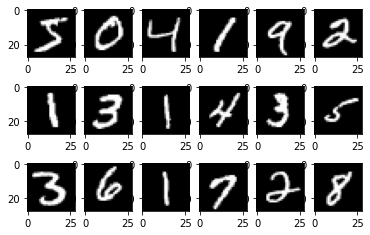

In [ ]:
import matplotlib.pyplot as plt

for k, (image,label) in enumerate(mnist_train[:18]):
  plt.subplot(3,6,k+1)
  plt.imshow(image,cmap='gray')
 
  

In [ ]:
from torchvision import transforms

img_to_tensor = transforms.ToTensor()

img_tensor = img_to_tensor(image)

img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
mnist_train = datasets.MNIST('data', train=True, transform=img_to_tensor, download=True)
mnist_train = list(mnist_train)[:2500]
print(mnist_train[0])

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.00

In [ ]:
mnist_train , mnist_val = mnist_train[:2000] , mnist_train[2000:]

In [ ]:
import torch
import torch.nn as nn

In [ ]:
example_model = nn.Linear(50,1)


In [ ]:
weight,bias = list(example_model.parameters())
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[ 0.0406,  0.0720,  0.0819, -0.0032,  0.0984,  0.0706, -0.1344, -0.0383,
         -0.0889,  0.0884,  0.0105, -0.0025,  0.0120,  0.1227,  0.0191, -0.0907,
         -0.0627,  0.0737, -0.1139, -0.0889, -0.0974,  0.0746, -0.0991,  0.1139,
          0.0483,  0.1143,  0.0570, -0.0716, -0.1291,  0.0095,  0.0700,  0.0197,
         -0.0908, -0.1240, -0.0499, -0.1068,  0.1233,  0.0597, -0.0219, -0.0299,
         -0.0002,  0.1045, -0.0922, -0.0380, -0.0965, -0.0272, -0.0589,  0.1121,
          0.0107,  0.0531]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([0.1357], requires_grad=True)
torch.Size([1])


In [ ]:
model = nn.Linear(784, 10) # 784 = 28*28

# Let's verify that the shapes of the weights and biases are what we expect
weight, bias = list(model.parameters())
print(weight.shape)
print(bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [ ]:
x = torch.randn(50)
x.shape

torch.Size([50])

In [ ]:
y = example_model(x)
y.shape

torch.Size([1])

In [ ]:
x = torch.randn(32,50)
y= example_model(x)
print(x.shape)
print(y.shape)

torch.Size([32, 50])
torch.Size([32, 1])


In [ ]:
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
img_tensor.reshape(-1,28*28)


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
x = img_tensor.view(-1,784)
print(x.shape)
z = model(x)
print(z)
print(z.shape)
y= torch.softmax(z,dim=1)
print(y)

torch.Size([1, 784])
tensor([[ 0.1056, -0.0190, -0.1201,  0.0417, -0.2686, -0.1609, -0.1034, -0.0781,
         -0.2948, -0.2359]], grad_fn=<AddmmBackward>)
torch.Size([1, 10])
tensor([[0.1235, 0.1090, 0.0985, 0.1159, 0.0849, 0.0946, 0.1002, 0.1028, 0.0827,
         0.0878]], grad_fn=<SoftmaxBackward>)


In [ ]:
criterion = nn.CrossEntropyLoss()


In [ ]:
loss = criterion(y, torch.Tensor([8]).long())
loss

tensor(2.3199, grad_fn=<NllLossBackward>)

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(),lr=0.01)

loss.backward()
optimizer.step()
optimizer.zero_grad()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.005, weight_decay=0.01)

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size,shuffle=True)
for (xs,ts) in enumerate(train_loader):
  print(xs)
  print(ts)



0
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ...,

In [ ]:
def run_gradient_descent(model,
                         batch_size=64,
                         learning_rate=0.01,
                         weight_decay=0,
                         num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    iters, losses = [], []
    iters_sub, train_acc, val_acc  = [], [] ,[]

    train_loader = torch.utils.data.DataLoader(
        mnist_train,
        batch_size=batch_size,
        shuffle=True)

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for xs, ts in iter(train_loader):
            if len(ts) != batch_size:
                continue
            xs = xs.view(-1, 784)    # flatten the image. The -1 is a wildcard
            zs = model(xs)
            loss = criterion(zs, ts) # compute the total loss
            loss.backward()          # compute updates for each parameter
            optimizer.step()         # make the updates for each parameter
            optimizer.zero_grad()    # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)  # compute *average* loss

            if n % 10 == 0:
                iters_sub.append(n)
                train_acc.append(get_accuracy(model, mnist_train))
                val_acc.append(get_accuracy(model, mnist_val))
            # increment the iteration number
            n += 1

    # plotting
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters_sub, train_acc, label="Train")
    plt.plot(iters_sub, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

    return model

def get_accuracy(model, data):
    loader = torch.utils.data.DataLoader(data, batch_size=500)

    correct, total = 0, 0
    for xs, ts in loader:
        xs = xs.view(-1, 784) # flatten the image
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(ts.view_as(pred)).sum().item()
        total += int(ts.shape[0])
        return correct / total

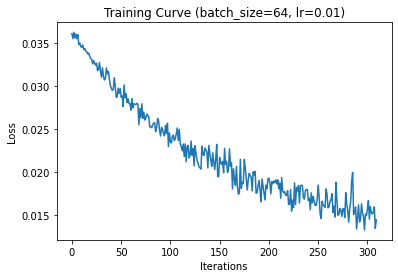

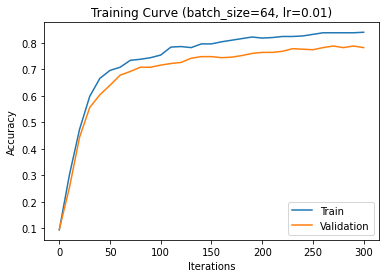

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
model = nn.Linear(784, 10)
run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)